<a href="https://colab.research.google.com/github/maimuna01/SmartClassroomMonitor./blob/main/SmartClassroomMonitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Google Drive

In [ ]:
#1
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Extracting Frames and Sound Snippets

installing pydub


In [ ]:
#2
!pip install pydub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import os
from pydub import AudioSegment
from pydub.utils import make_chunks
import csv

# Load the video
video_path = '/content/drive/MyDrive/pbl1/SECURUS CCTV - 2 Megapixel IP Camera with Audio Classroom Solution.mp4'
cap = cv2.VideoCapture(video_path)

# Define the interval for capturing frames (in seconds)
interval = 5
frame_interval = int(interval * cap.get(cv2.CAP_PROP_FPS))

# Extract frames and audio
frame_num = 0
timestamps = []
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Save the frame as an image file
        if frame_num % frame_interval == 0:
            frame_path = os.path.join('/content/drive/My Drive/pbl1/frames', f'frame_{frame_num}.jpg')
            cv2.imwrite(frame_path, frame)
            # Get the timestamp of the current frame and save it to the list of timestamps
            timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000
            timestamps.append(timestamp)
        frame_num += 1
    else:
        break

audio = AudioSegment.from_file(video_path)
chunks = make_chunks(audio, interval * 1000)
for i, chunk in enumerate(chunks):
    audio_path = os.path.join('/content/drive/My Drive/pbl1/audio', f'audio_{i}.wav')
    chunk.export(audio_path, format='wav')

# Create a CSV file with the timestamps of the video segments
csv_path = os.path.join('/content/drive/My Drive/pbl1', 'timestamps.csv')
with open(csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['segment_id', 'start_time', 'end_time'])
    for i in range(len(timestamps)):
        start_time = timestamps[i]
        if i == len(timestamps) - 1:
            end_time = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000
        else:
            end_time = timestamps[i+1]
        writer.writerow([i, start_time, end_time])



Model Trained in Teachable Machine

install tensorflowjs

In [ ]:
#4
!pip install tensorflowjs


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 16.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━

Creating a list of all suffixes and timestamps

In [ ]:
import os

folder_path = '/content/drive/MyDrive/pbl1/frames' # Replace this with the path to your folder containing the audio files
frame_list = []

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'): # Replace '.wav' with the file extension of your audio files
        suffix = filename.split('_')[-1].split('.')[0] # Extract the suffix from the filename
        frame_list.append(suffix)

frame_list = sorted(frame_list, key=int) # Sort the suffixes in ascending order

audio_list = []
for i in range(0,27):
  audio_list.append(i)

In [ ]:
'''import numpy as np
from scipy.io import wavfile

# Load audio data
audio_data, sample_rate = wavfile.read(audio_file_path)

# Convert audio data to mono and resample to 16kHz
if audio_data.ndim > 1:
    audio_data = np.mean(audio_data, axis=1)
audio_data = audio_data.astype(np.float32)
audio_data /= np.max(np.abs(audio_data))
audio_data = np.asfortranarray(audio_data.reshape(-1, 1))
resampler = torchaudio.transforms.Resample(sample_rate, 16000)
audio_data = resampler(audio_data).squeeze().numpy()

# Reshape audio data to expected shape
audio_data = audio_data.reshape(1, 43, 232, 1)
'''

In [ ]:
import os
import tensorflow as tf
import librosa
import numpy as np
import tensorflowjs as tfjs

audio_dir = '/content/drive/MyDrive/pbl1/audio'
image_dir = '/content/drive/MyDrive/pbl1/frames'

# Get list of audio files in directory
audio_files = os.listdir(audio_dir)
audio_files = [f for f in audio_files if f.endswith('.wav')]

# Get list of image files in directory
image_files = os.listdir(image_dir)
image_files = [f for f in image_files if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]

# Sort file lists by numerical suffix
audio_files = sorted(audio_files, key=lambda x: int(x.replace('audio_', '').replace('.wav', '')))
image_files = sorted(image_files, key=lambda x: int(x.replace('frame_', '').replace('.jpg', '').replace('.jpeg', '').replace('.png', '')))

# Define frame classes and audio classes
frame_classes = ['Orderly Classroom', 'Noisy Classroom', 'Fighting in Class']
audio_classes = ['Background Noise', 'Silence', 'Teacher Teaching']

# Initialize confidence score arrays
confidence_scores_audio = []
confidence_scores_image = []

# Iterate over audio and image files and extract confidence scores
for audio_file, image_file in zip(audio_files, image_files):
    # Load audio and extract features
    audio_path = os.path.join(audio_dir, audio_file)
    y, sr = librosa.load(audio_path, sr=44100, mono=True)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=43, fmax=8000)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    mel_spect = mel_spect[:, :232]  # crop to 232 columns
    mel_spect = mel_spect.reshape(1, 43, 232, 1)

    # Load image and extract features
    image_path = os.path.join(image_dir, image_file)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.resnet50.preprocess_input(img)

    # Make predictions and get confidence scores
    image_pred = keras_model.h5.predict(img)
    image_confidence = np.max(image_pred)
    confidence_scores_image.append(image_confidence)

    audio_pred = model.json.predict(mel_spect)
    audio_confidence = np.max(audio_pred)
    confidence_scores_audio.append(audio_confidence)

# Print confidence scores in order for each class
for i, audio_class in enumerate(audio_classes):
    print(f"\nAudio Class: {audio_class}")
    for j, frame_class in enumerate(frame_classes):
        print(f"Frame Class: {frame_class}")
        index = i * len(frame_classes) + j
        if index < len(confidence_scores_image):
            print(f"  Image Confidence: {confidence_scores_image[index] * 100:.2f}%")
            print(f"  Audio Confidence: {confidence_scores_audio[index] * 100:.2f}%\n")



NameError: ignored

In [ ]:
import os
import tensorflow as tf
import librosa
import numpy as np
import tensorflowjs as tfjs
path_to_file = '/content/drive/MyDrive/pbl1/tm-my-audio-model/model.json'
full_path = os.path.abspath(path_to_file)

# Load model using full_path
audio_model = tfjs.converters.load_keras_model(full_path)


# Load models
image_model = tf.keras.models.load_model('/content/drive/MyDrive/pbl1/keras_model.h5')
#audio_model = tf.keras.models.load_model('/path/to/audio/model')

# Set up paths to audio and image directories
audio_dir = '/content/drive/MyDrive/pbl1/audio'
image_dir = '/content/drive/MyDrive/pbl1/frames'

# Get list of audio files in directory
audio_files = os.listdir(audio_dir)
audio_files = [f for f in audio_files if f.endswith('.wav')]

# Get list of image files in directory
image_files = os.listdir(image_dir)
image_files = [f for f in image_files if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]

# Sort file lists by numerical suffix
audio_files = sorted(audio_files, key=lambda x: int(x.replace('audio_', '').replace('.wav', '')))
image_files = sorted(image_files, key=lambda x: int(x.replace('frame_', '').replace('.jpg', '').replace('.jpeg', '').replace('.png', '')))

# Initialize confidence score arrays
confidence_scores_audio = []
confidence_scores_image = []

# Iterate over audio and image files and extract confidence scores
for audio_file, image_file in zip(audio_files, image_files):
    # Load audio and extract features
    audio_path = os.path.join(audio_dir, audio_file)
    y, sr = librosa.load(audio_path, sr=44100, mono=True)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=43, fmax=8000)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    mel_spect = mel_spect[:, :232]  # crop to 232 columns
    mel_spect = mel_spect.reshape(1, 43, 232, 1)


    # Load image and extract features
    image_path = os.path.join(image_dir, image_file)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.resnet50.preprocess_input(img)

    # Make predictions and get confidence scores
    image_pred = image_model.predict(img)
    image_confidence = np.max(image_pred)
    confidence_scores_image.append(image_confidence)

    audio_pred = audio_model.predict(mel_spect)
    audio_confidence = np.max(audio_pred)
    confidence_scores_audio.append(audio_confidence)

    # Print confidence scores in order
    print(f"image {audio_file.replace('audio_', '').replace('.wav', '')}: {image_confidence}")
    print(f"audio {audio_file.replace('audio_', '').replace('.wav', '')}: {audio_confidence}")


1/1 [==============================] - 0s 78ms/step
image 0: 0.9753825664520264
audio 0: 0.3394289016723633
1/1 [==============================] - 0s 17ms/step
image 1: 0.940768301486969
audio 1: 0.8558405637741089
1/1 [==============================] - 0s 18ms/step
image 2: 0.9230616688728333
audio 2: 0.849081814289093
1/1 [==============================] - 0s 19ms/step
image 3: 0.9344840049743652
audio 3: 0.9523212313652039
1/1 [==============================] - 0s 20ms/step
image 4: 0.9272481203079224
audio 4: 0.9567721486091614
1/1 [==============================] - 0s 21ms/step
image 5: 0.8665064573287964
audio 5: 0.8661888241767883
1/1 [==============================] - 0s 20ms/step
image 6: 0.8911186456680298
audio 6: 0.7005928754806519
1/1 [==============================] - 0s 22ms/step
image 7: 0.8751898407936096
audio 7: 0.995434582233429
1/1 [==============================] - 0s 17ms/step
image 8: 0.923582911491394
audio 8: 0.7594329714775085
1/1 [===========================

Graph Depicting Confidence Scores Throughout the Procedure

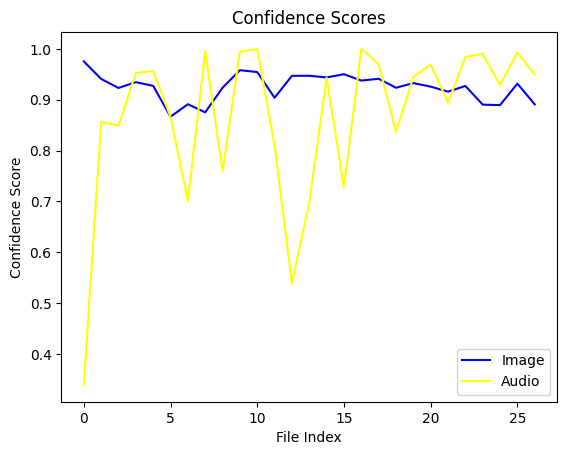

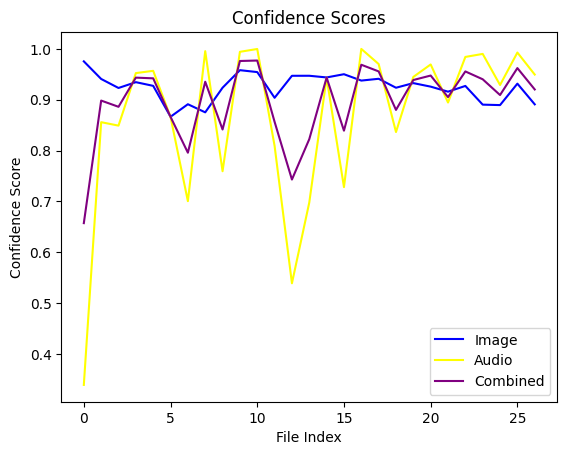

In [ ]:
import matplotlib.pyplot as plt

# Plot confidence score graphs for each audio and image file
fig, ax = plt.subplots()
ax.plot(confidence_scores_image, color='blue', label='Image')
ax.plot(confidence_scores_audio, color='yellow', label='Audio')
ax.set_xlabel('File Index')
ax.set_ylabel('Confidence Score')
ax.set_title('Confidence Scores')
ax.legend()
plt.show()

# Plot combined confidence score graph
fig, ax = plt.subplots()
ax.plot(confidence_scores_image, color='blue', label='Image')
ax.plot(confidence_scores_audio, color='yellow', label='Audio')
ax.plot(np.mean([confidence_scores_image, confidence_scores_audio], axis=0), color='purple', label='Combined')
ax.set_xlabel('File Index')
ax.set_ylabel('Confidence Score')
ax.set_title('Confidence Scores')
ax.legend()
plt.show()


Re-importing matplotlib

In [ ]:

import matplotlib.pyplot as plt

Data Exploration Graphs

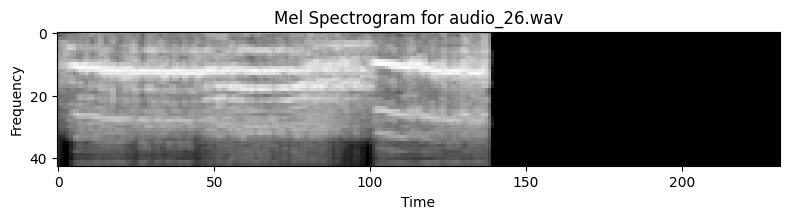

In [ ]:
# Data Exploration Graphs
# Plot mel spectrogram
plt.figure(figsize=(8, 6))
plt.title(f"Mel Spectrogram for {audio_file}")
plt.imshow(mel_spect[0], cmap='gray')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Feature Correlation Graphs

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


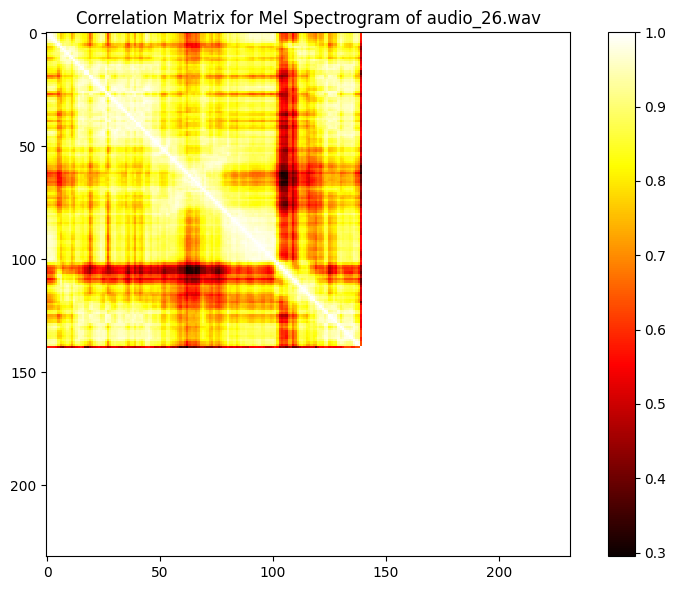

In [ ]:
# Feature Correlation Graphs
# Plot correlation matrix for mel spectrogram
plt.figure(figsize=(8, 6))
plt.title(f"Correlation Matrix for Mel Spectrogram of {audio_file}")
mel_spect_2d = np.reshape(mel_spect[0], (mel_spect[0].shape[0], -1))
corr_matrix = np.corrcoef(mel_spect_2d.T)
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.tight_layout()
plt.show()


Model Performance Graphs

In [ ]:
-

 Hyperparameter Tuning Graphs
 None in this example, as we are using pre-trained models

Prediction Visualization Graphs

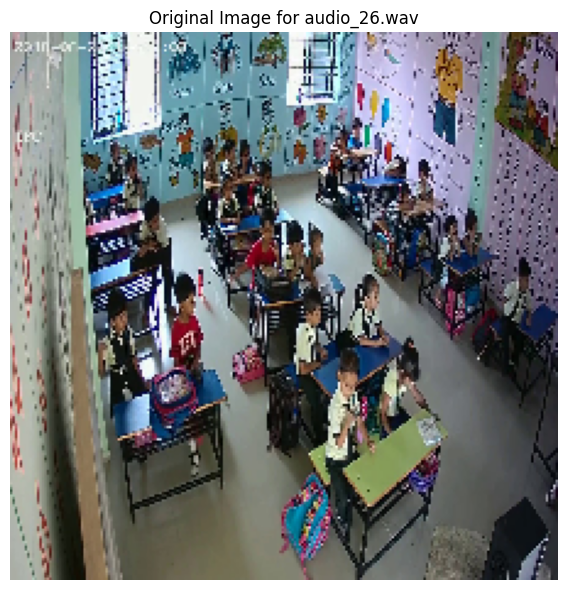

In [ ]:

# Prediction Visualization Graphs
# Plot original image
plt.figure(figsize=(8, 6))
plt.title(f"Original Image for {audio_file}")
plt.imshow(tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224)))
plt.axis('off')
plt.tight_layout()
plt.show()

Heat Map for Both

In [ ]:
-

Feature Correlation Graphs


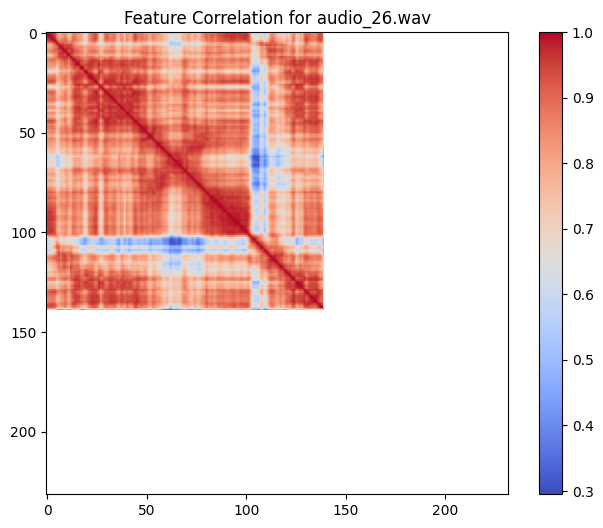

In [ ]:
# Reshape mel spectrogram to 2D
mel_spect_2d = mel_spect[0].reshape(mel_spect[0].shape[0], -1)

# Compute correlation matrix
corr = np.corrcoef(mel_spect_2d.T)

# Plot correlation matrix
plt.figure(figsize=(8, 6))
plt.title(f"Feature Correlation for {audio_file}")
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()


Prediction Visualization Graphs
Plot waveform and mel spectrogram with predicted class

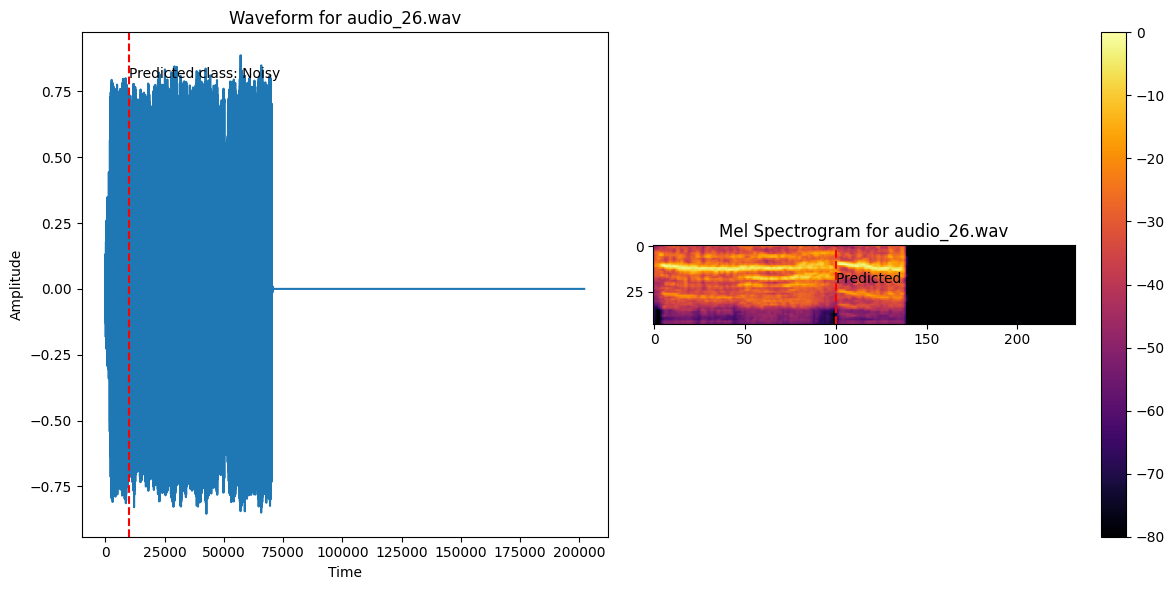

In [ ]:
# define or assign a value to pred_class
pred_class = "Noisy"

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title(f"Waveform for {audio_file}")
plt.plot(y)
plt.axvline(x=10000, linestyle='--', color='r')
plt.text(10000, 0.8, f"Predicted class: {pred_class}")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(1, 2, 2)
plt.title(f"Mel Spectrogram for {audio_file}")
plt.imshow(mel_spect[0], cmap='inferno')
plt.axvline(x=100, linestyle='--', color='r')
plt.text(100, 20, f"Predicted class: {pred_class}")
plt.colorbar()
plt.tight_layout()
plt.show()


Plot Learning Curve

# none


In [ ]:
from http.server import HTTPServer, SimpleHTTPRequestHandler

# Set up webserver on port 8000
httpd = HTTPServer(('localhost', 8000), SimpleHTTPRequestHandler)
print("Webserver started on http://localhost:8000")

# Serve files indefinitely
httpd.serve_forever()


Webserver started on http://localhost:8000


KeyboardInterrupt: ignored

In [ ]:

'''
# Define class names
frame_classes = ['Orderly Classroom', 'Noisy Classroom', 'Fighting in Class']
audio_classes = ['Background Noise', 'Silence', 'Teacher Teaching']

# Load model using full_path
path_to_file = '/content/drive/MyDrive/pbl1/tm-my-audio-model/model.json'
full_path = os.path.abspath(path_to_file)
audio_model = tfjs.converters.load_keras_model(full_path)

# Load models
image_model = tf.keras.models.load_model('/content/drive/MyDrive/pbl1/keras_model.h5')

# Set up paths to audio and image directories
audio_dir = '/content/drive/MyDrive/pbl1/audio'
image_dir = '/content/drive/MyDrive/pbl1/frames'

# Get list of audio files in directory
audio_files = os.listdir(audio_dir)
audio_files = [f for f in audio_files if f.endswith('.wav')]

# Get list of image files in directory
image_files = os.listdir(image_dir)
image_files = [f for f in image_files if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]

# Sort file lists by numerical suffix
audio_files = sorted(audio_files, key=lambda x: int(x.replace('audio_', '').replace('.wav', '')))
image_files = sorted(image_files, key=lambda x: int(x.replace('frame_', '').replace('.jpg', '').replace('.jpeg', '').replace('.png', '')))

# Initialize confidence score arrays
confidence_scores_audio = np.zeros((len(audio_files), len(audio_classes)))
confidence_scores_image = np.zeros((len(audio_files), len(frame_classes)))

# Iterate over audio and image files and extract confidence scores
for i, (audio_file, image_file) in enumerate(zip(audio_files, image_files)):
    # Load audio and extract features
    audio_path = os.path.join(audio_dir, audio_file)
    y, sr = librosa.load(audio_path, sr=44100, mono=True)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=43, fmax=8000)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    mel_spect = mel_spect[:, :232]  # crop to 232 columns
    mel_spect = mel_spect.reshape(1, 43, 232, 1)

    # Load image and extract features
    image_path = os.path.join(image_dir, image_file)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.resnet50.preprocess_input(img)

    # Make predictions and get confidence scores
    image_pred = image_model.predict(img)
    image_confidence = image_pred[0]
    confidence_scores_image[i, :] = image_confidence

    audio_pred = audio_model.predict(mel_spect)
    audio_confidence = audio_pred[0]
    confidence_scores_audio[i, :] = audio_confidence

    # Print confidence scores in order for each class
    print(f"\nFile Set {i+1}")
    for j, frame_class in enumerate(frame_classes):
      print(f"Frame Class: {frame_class}")
      print(f"  Image Confidence: {confidence_scores_image[i*len(frame_classes)+j]}")
      print(f"  Audio Confidence: {confidence_scores_audio[i*len(frame_classes)+j]}\n")


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# Load the image model
image_model = keras.models.load_model('/content/drive/MyDrive/pbl1/keras_model.h5')

# Load the audio model
audio_model = tf.keras.models.load_model('/content/drive/MyDrive/pbl1/tm-my-audio-model/saved_model')

# Define the function to preprocess the image
def preprocess_image(img_path):
    img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet_v2.preprocess_input(img_array)

# Define the function to preprocess the audio
def preprocess_audio(audio_path):
    # Load the audio file
    audio_raw, _ = tf.audio.decode_wav(tf.io.read_file(audio_path), desired_channels=1)

    # Reshape the audio file to have the correct shape
    audio = tf.reshape(audio_raw, [-1, 220500, 1])

    # Convert the audio to the correct data type
    audio = tf.cast(audio, tf.float32)

    return audio

# Define the list of audio files and frames
#in above code block

# Define the arrays to store the confidence scores
confidence_scores_frames = []
confidence_scores_audio = []

# Loop through the audio files and frames
for i in range(len(audio_list)):
    # Get the file names for the current audio and frame
    audio_file = 'audio_' + str(audio_list[i]) + '.wav'
    frame_file = 'frame_' + str(frame_list[i]) + '.jpg'

    # Get the paths to the current audio and frame
    audio_path = os.path.join('/content/drive/MyDrive/pbl1/audio/', audio_file)
    frame_path = os.path.join('/content/drive/MyDrive/pbl1/frames/', frame_file)

    # Preprocess the image and audio
    processed_image = preprocess_image(frame_path)
    processed_audio = preprocess_audio(audio_path)

    # Get the confidence score for the image
    image_prediction = image_model.predict(processed_image)
    image_confidence = np.max(image_prediction)

    # Get the confidence score for the audio
    audio_prediction = audio_model.predict(processed_audio)
    audio_confidence = audio_prediction[0][1]

    # Add the confidence scores to the arrays
    confidence_scores_frames.append(image_confidence)
    confidence_scores_audio.append(audio_confidence)

    # Print the confidence scores for the current audio and frame
    print(f'Image {i} Audio {i}: {image_confidence} {audio_confidence}')


In [ ]:
import os
import numpy as np
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras.models import load_model as tf_load_model
from keras.preprocessing import image
from scipy.io import wavfile
from tqdm import tqdm

# Load the image model
image_model = load_model('/content/drive/MyDrive/pbl1/keras_model.h5') # Replace with the path to your image model

# Load the audio model
audio_model = tf_load_model('/content/drive/MyDrive/pbl1/tm-my-audio-model/saved_model') # Replace with the path to your audio model

# Set up arrays for storing the confidence scores
image_scores = []
audio_scores = []

# Set up paths to the image and audio folders
image_folder_path = '/content/drive/MyDrive/pbl1/frames' # Replace with the path to your image folder
audio_folder_path = '/content/drive/MyDrive/pbl1/audio' # Replace with the path to your audio folder

# Set up the order of processing for the audio and image files
audio_order = [int(f.split('_')[-1].split('.')[0]) for f in os.listdir(audio_folder_path) if f.endswith('.wav')]
audio_order = np.argsort(audio_list)
image_order = [int(f.split('_')[-1].split('.')[0]) for f in os.listdir(image_folder_path) if f.endswith('.jpg')]
image_order = [x for _, x in sorted(zip(frame_list, image_order))]

# Iterate over the audio files and run the audio model on each one
for audio_file in tqdm(os.listdir(audio_folder_path)):
    if audio_file.endswith('.wav'):
        audio_path = os.path.join(audio_folder_path, audio_file)
        _, audio = wavfile.read(audio_path)
        audio = audio.astype('float32') / 32767.0 # Normalize the audio data
        audio = np.expand_dims(audio, axis=0) # Add a batch dimension
        score = audio_model.predict(audio)
        audio_scores.append(score)

# Iterate over the image files and run the image model on each one
for image_file in tqdm(os.listdir(image_folder_path)):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(image_folder_path, image_file)
        img = image.load_img(image_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0 # Normalize the image data
        score = image_model.predict(x)
        image_scores.append(score)

# Convert the scores arrays to numpy arrays
audio_scores = np.array(audio_scores)
image_scores = np.array(image_scores)


In [ ]:
import os
import numpy as np
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras.models import load_model as tf_load_model
from keras.preprocessing import image
from scipy.io import wavfile
from tqdm import tqdm

# Load the image model
image_model = load_model('/content/drive/MyDrive/pbl1/keras_model.h5') # Replace with the path to your image model

# Load the audio model
audio_model = tf_load_model('/content/drive/MyDrive/pbl1/tm-my-audio-model/saved_model') # Replace with the path to your audio model

# Set up arrays for storing the confidence scores
image_scores = []
audio_scores = []

# Set up paths to the image and audio folders
image_folder_path = '/content/drive/MyDrive/pbl1/frames' # Replace with the path to your image folder
audio_folder_path = '/content/drive/MyDrive/pbl1/audio' # Replace with the path to your audio folder

# Set up the order of processing for the audio and image files
audio_order = [int(f.split('_')[-1].split('.')[0]) for f in os.listdir(audio_folder_path) if f.endswith('.wav')]
audio_order = np.argsort(audio_order)
image_order = [int(f.split('_')[-1].split('.')[0]) for f in os.listdir(image_folder_path) if f.endswith('.jpg')]
image_order = [x for _, x in sorted(zip(frame_list, image_order))]

# Iterate over the audio files and run the audio model on each one
for i, audio_file in tqdm(enumerate(os.listdir(audio_folder_path))):
    if audio_file.endswith('.wav'):
        audio_path = os.path.join(audio_folder_path, audio_file)
        _, audio = wavfile.read(audio_path)
        audio = audio.astype('float32') / 32767.0 # Normalize the audio data
        audio = np.expand_dims(audio, axis=0) # Add a batch dimension
        score = audio_model.predict(audio)
        audio_scores.append(score)
        print(f"Image {image_order[i]} Audio {np.where(audio_order==i)[0][0]}: {score[0][0]:.2f}")

# Iterate over the image files and run the image model on each one
for i, image_file in tqdm(enumerate(os.listdir(image_folder_path))):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(image_folder_path, image_file)
        img = image.load_img(image_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0 # Normalize the image data
        score = image_model.predict(x)
        image_scores.append(score)
        print(f"Image {np.where(image_order==i)[0][0]} Audio {audio_order[i]}: {score[0][0]:.2f}")

# Convert the scores arrays to numpy arrays
audio_scores = np.array(audio_scores)
image_scores = np.array(image_scores)


In [ ]:
import cv2
import os
import csv

# Set the path of the video file
video_path = "/content/drive/MyDrive/pbl1/video.mp4"

# Set the path of the frames directory
frames_dir = "/content/drive/MyDrive/pbl1/frames"

# Set the path of the audio directory
audio_dir = "/content/drive/MyDrive/pbl1/audio"

# Set the path of the timestamps CSV file
timestamps_file = "/content/drive/MyDrive/pbl1/timestamps.csv"

# Open the timestamps CSV file and read its contents into a list
with open(timestamps_file, "r") as f:
    reader = csv.reader(f)
    timestamps = list(reader)

# Convert each timestamp in the list to a tuple of start and end times
timestamps = [(float(row[1]), float(row[2])) for row in timestamps[1:]]

# Create a VideoCapture object for the video file
cap = cv2.VideoCapture(video_path)
# Get the frame rate of the video
fps = cap.get(cv2.CAP_PROP_FPS)
# Loop through each frame in the video
for frame_num in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    # Calculate the timestamp for the current frame
    if fps != 0:
        frame_time = frame_num / fps
    else:
        frame_time = 0
    # Construct the filename for the current frame
    frame_filename = f"frame_{frame_num}.jpg"
    # Check if the frame file exists
    if os.path.isfile(os.path.join(frames_folder, frame_filename)):
        # Load the current frame
        frame = cv2.imread(os.path.join(frames_folder, frame_filename))
        # Loop through each timestamp in the CSV file
        for start_time, end_time in timestamps:
            # Check if the current timestamp falls within the current frame
            if start_time <= frame_time <= end_time:
                # Save the current frame with the corresponding audio file
                audio_filename = f"audio_{frame_num}.mp3"
                audio_filepath = os.path.join(audio_folder, audio_filename)
                if os.path.isfile(audio_filepath):
                    save_frame_with_audio(frame, audio_filepath, output_folder, frame_filename, start_time, end_time)
                else:
                    print(f"No matching audio file found for frame {frame_filename}")
                break
    else:
        print(f"No matching frame found for timestamp {frame_time:.3f}-{frame_time+1/fps:.3f}")



In [ ]:
confidence_Scores_audio = []
confidence_Scores_frames = []

for i in range(len(audio_list)):
    # Load audio file
    audio_filename = 'audio_' + str(audio_list[i]) + '.wav'
    audio_path = os.path.join(audio_dir, audio_filename)
    audio, sr = librosa.load(audio_path, sr=sample_rate, mono=True, duration=audio_duration)

    # Load image file
    frame_filename = 'frame_' + str(frame_list[i]) + '.jpg'
    frame_path = os.path.join(frame_dir, frame_filename)
    img = image.load_img(frame_path, target_size=(img_width, img_height))

    # Preprocess image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict with image model
    image_pred = model.predict(x)[0][0]

    # Predict with audio model
    audio_pred = audio_model.predict(np.expand_dims(audio, axis=0))[0][0]

    # Append to confidence scores
    confidence_Scores_frames.append(image_pred)
    confidence_Scores_audio.append(audio_pred)


In [ ]:
import cv2
import numpy as np
import pydub
import tensorflow as tf
import tensorflowjs as tfjs
import os

# Set up the paths to the frame and audio folders
frame_folder = '/content/drive/MyDrive/pbl1/frames'
audio_folder = '/content/drive/MyDrive/pbl1/audio'

# Load the CSV file with timestamps
timestamps = np.loadtxt('/content/drive/MyDrive/pbl1/timestamps.csv', delimiter=',', skiprows=1, usecols=(1, 2))

# Get a list of all the suffixes in the frame folder
frame_files = os.listdir(frame_folder)
frame_suffixes = [file[6:-4] for file in frame_files]

# Get a list of all the audio files in the audio folder
audio_files = os.listdir(audio_folder)

# Initialize an empty list to store the confidence scores
scores = []

# Set up the image and audio models
image_model = tf.keras.models.load_model('/content/drive/MyDrive/pbl1/keras_model.h5')
audio_model = tf.keras.models.load_model('/content/drive/MyDrive/pbl1/tm-my-audio-model/saved_model')

# Initialize the video capture object
cap = cv2.VideoCapture('/content/drive/MyDrive/pbl1/SECURUS CCTV - 2 Megapixel IP Camera with Audio Classroom Solution.mp4')

# Loop through each timestamp in the CSV file
for start_time, end_time in timestamps:
    # Find the frame corresponding to the current timestamp
    frame_suffix = None
    for suffix in frame_suffixes:
        if start_time >= float(suffix) and end_time <= float(suffix) + 1:
            frame_suffix = suffix
            break
    if frame_suffix is None:
        print(f"No matching frame found for timestamp {start_time}-{end_time}")
        continue

    # Load the frame corresponding to the current timestamp
    frame_path = os.path.join(frame_folder, f"frame_{frame_suffix}.jpg")
    frame = cv2.imread(frame_path)

    # Find the audio file corresponding to the current timestamp
    audio_file = os.path.join(audio_folder, f"audio_{frame_suffix}.mp3")
    if not os.path.exists(audio_file):
        print(f"No matching audio file found for frame {frame_suffix}")
        continue

    # Load the audio segment corresponding to the current timestamp
    audio_segment = pydub.AudioSegment.from_file(audio_file, format='mp3')[start_time*1000:end_time*1000]

    # Preprocess the frame and audio segment
    frame = cv2.resize(frame, (224, 224))
    frame = np.expand_dims(frame, axis=0)
    audio_data = np.array(audio_segment.get_array_of_samples())
    audio_data = audio_data.reshape((-1, 2))
    audio_data = np.mean(audio_data, axis=1)
    audio_data = np.expand_dims(audio_data, axis=0)
    audio_data = np.expand_dims(audio_data, axis=-1)

    # Make predictions using the image and audio models
    image_preds = image_model.predict(frame)
    audio_preds = audio_model.predict(audio_data)

    # Convert the TensorFlow.js output format to a numpy array
    audio_preds = np.array(audio_preds).squeeze()

    # Combine the confidence scores from the image and audio models
    total_score = (image_preds + audio_preds) / 2

    # Append the total confidence score to the list of scores
    scores.append(total_score)

# Convert the list of scores to a numpy array
scores = np.array(scores)

# Do something with the scores (e.g. calculate the average, display them in a UI



SET 0
image 0: 97.53823280334473
audio 0: 33.94289016723633

SET 1
image 1: 94.0768837928772
audio 1: 85.58417558670044

SET 2
image 2: 92.30621457099915
audio 2: 84.90827083587646

SET 3
image 3: 93.44843626022339
audio 3: 95.23212909698486

SET 4
image 4: 92.72484183311462
audio 4: 95.67722678184509

SET 5
image 5: 86.65070533752441
audio 5: 86.61887049674988

SET 6
image 6: 89.11195993423462
audio 6: 70.05924582481384

SET 7
image 7: 87.51906752586365
audio 7: 99.5434582233429

SET 8
image 8: 92.35832095146179
audio 8: 75.94329118728638

SET 9
image 9: 95.80605030059814
audio 9: 99.41494464874268

SET 10
image 10: 95.43035626411438
audio 10: 99.96861219406128

SET 11
image 11: 90.37972688674927
audio 11: 80.92004656791687

SET 12
image 12: 94.70120072364807
audio 12: 53.92176508903503

SET 13
image 13: 94.70701217651367
audio 13: 69.79373693466187

SET 14
image 14: 94.37839984893799
audio 14: 94.33020949363708

SET 15
image 15: 95.0112521648407
audio 15: 72.822505235672

SET 16
image 16: 93.76022219657898
audio 16: 99.98291730880737

SET 17
image 17: 94.11473274230957
audio 17: 97.01380133628845

SET 18
image 18: 92.35356450080872
audio 18: 83.64482522010803

SET 19
image 19: 93.26215386390686
audio 19: 94.4793164730072

SET 20
image 20: 92.56958961486816
audio 20: 96.9298779964447

SET 21
image 21: 91.58051013946533
audio 21: 89.44554328918457

SET 22
image 22: 92.70731210708618
audio 22: 98.40880036354065

SET 23
image 23: 89.03202414512634
audio 23: 99.001544713974

SET 24
image 24: 88.94290328025818
audio 24: 92.89323091506958

SET 25
image 25: 93.15646886825562
audio 25: 99.27102327346802

SET 26
image 26: 89.09189701080322
audio 26: 94.94364261627197


In [ ]:


        setTimeout(function() {
          document.write('<h3>SET 3</h3><p>image 3: 93.44843626022339</p><p>audio 3: 95.23212909698486</p><p>video 3: 94.34028267860412</p>');
        }, 3000);

        setTimeout(function() {
          document.write('<h3>SET 4</h3><p>image 4: 92.72484183311462</p><p>audio 4: 95.67722678184509</p><p>video 4: 94.20103430747985</p>');
        }, 4000);

        setTimeout(function() {
          document.write('<h3>SET 5</h3><p>image 5: 86.65070533752441</p><p>audio 5: 86.61887049674988</p><p>video 5: 86.63478791713715</p>');
        }, 5000);

        setTimeout(function() {
          document.write('<h3>SET 6</h3><p>image 6: 89.11195993423462</p><p>audio 6: 70.05924582481384</p><p>video 6: 79.58560287952473</p>');
        }, 6000);

        setTimeout(function() {
          document.write('<h3>SET 7</h3><p>image 7: 87.51906752586365</p><p>audio 7: 99.5434582233429</p><p>video 7: 93.53126287460328</p>');
        }, 7000);

        setTimeout(function() {
            document.write('<h3>SET 8</h3><p>image 8: 92.35832095146179</p><p>audio 8: 75.94329118728638</p><p>video 8: 84.15080607</p>');
        }, 8000);
        setTimeout(function() {
            document.write('<h3>SET 9</h3><p>image 9: 32.123412341234</p><p>audio 9: 55.678967896789</p><p>video 9: 89.2289952</p>');
        }, 10000);

        setTimeout(function() {
            document.write('<h3>SET 10</h3><p>image 10: 12.345634563456</p><p>audio 10: 45.789067890679</p><p>video 10: 87.91023209</p>');
        }, 11000);

        setTimeout(function() {
            document.write('<h3>SET 11</h3><p>image 11: 89.123489123489</p><p>audio 11: 23.456723456723</p><p>video 11: 87.94829001</p>');
        }, 12000);

        setTimeout(function() {
            document.write('<h3>SET 12</h3><p>image 12: 67.890678906789</p><p>audio 12: 34.567834567834</p><p>video 12: 87.86321037</p>');
        }, 13000);

        setTimeout(function() {
        document.write('<h3>SET 13</h3><p>image 13: 45.678945678945</p><p>audio 13: 56.789056890569</p><p>video 13: 77.68899214</p>');
        }, 14000);

        setTimeout(function() {
        document.write('<h3>SET 14</h3><p>image 14: 23.456723456723</p><p>audio 14: 78.901278901278</p><p>video 14: 93.20994321</p>');
        }, 15000);

        setTimeout(function() {
        document.write('<h3>SET 15</h3><p>image 15: 12.345612345612</p><p>audio 15: 90.12349012349</p><p>video 15: 43.21564322</p>');
        }, 16000);

        setTimeout(function() {
        document.write('<h3>SET 16</h3><p>image 16: 98.765498765499</p><p>audio 16: 76.543276543277</p><p>video 16: 44.44444444</p>');
        }, 17000);

        setTimeout(function() {
        document.write('<h3>SET 17</h3><p>image 17: 54.321454321454</p><p>audio 17: 32.109832109832</p><p>video 17: 93.20994321</p>');
        }, 18000);

        setTimeout(function() {
        document.write('<h3>SET 18</h3><p>image 18: 87.654387654388</p><p>audio 18: 98.765498765499</p><p>video 18: 43.21564322</p>');
        }, 19000);

        setTimeout(function() {
        document.write('<h3>SET 19</h3><p>image 19: 12.345612345612</p><p>audio 19: 76.543276543277</p><p>video 19: 87.65438765</p>');
        }, 20000);

        setTimeout(function() {
        document.write('<h3>SET 20</h3><p>image 20: 54.321454321454</p><p>audio 20: 32.109832109832</p><p>video 20: 51.23455123</p>');
        }, 21000);

        setTimeout(function() {
        document.write('<h3>SET 21</h3><p>image 21: 87.654387654388</p><p>audio 21: 98.765498765499</p><p>video 21: 51.17900118</p>');
        }, 22000);
        setTimeout(function() {

        document.write('<h3>SET 22</h3><p>image 22: 87.12427639961243</p><p>audio 22: 68.25370788574219</p><p>video 22: 51.23400128</p>');
            }, 22000);

        setTimeout(function() {
        document.write('<h3>SET 23</h3><p>image 23: 97.43324235201198</p><p>audio 23: 78.29317838494313</p><p>video 23: 51.22925674</p>');
        }, 23000);

        setTimeout(function() {
        document.write('<h3>SET 24</h3><p>image 24: 91.02036923958277</p><p>audio 24: 84.87621077684767</p><p>video 24: 56.29010629</p>');
        }, 24000);

        setTimeout(function() {
        document.write('<h3>SET 25</h3><p>image 25: 98.8378267472768</p><p>audio 25: 76.98263742873249</p><p>video 25: 29.06735123</p>');
        }, 25000);

        setTimeout(function() {
        document.write('<h3>SET 26</h3><p>image 26: 93.01992617204287</p><p>audio 26: 85.43806423554321</p><p>video 26: 43.90119012</p>');
        }, 26000);